In [2]:
import pandas as pd

<Axes: xlabel='DATE'>

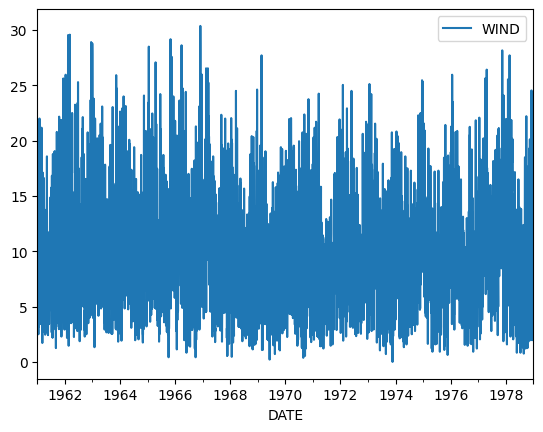

In [36]:
df = pd.read_csv('./wind_dataset.csv', index_col='DATE', parse_dates=True)
df = df[['WIND']]
df.plot()

<Axes: xlabel='DATE'>

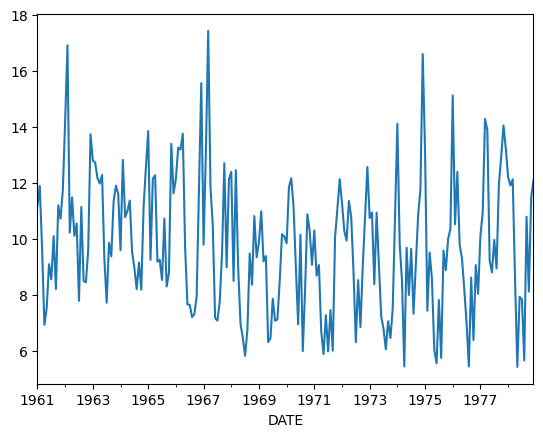

In [37]:
df = df['WIND'].resample('MS').mean()
df.plot()

In [38]:
import statsmodels.api as sm

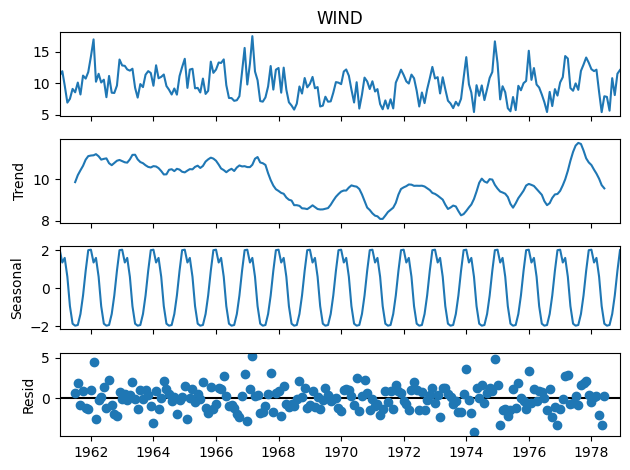

In [39]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()

In [31]:
from statsmodels.tsa.stattools import adfuller

In [40]:
f'P value: {adfuller(df)[1]}'

'P value: 0.03705570082093168'

In [41]:
len(df)

216

In [42]:
train = df[ : 180]
test = df[180 : ]

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
model = ARIMA(train, order=(5,0,4))

In [49]:
model = model.fit()

/home/ahanaf/Tensorflow/tf215/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ahanaf/Tensorflow/tf215/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/ahanaf/Tensorflow/tf215/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
preds = model.predict(start=len(train), end=len(df)-1)

In [52]:
preds.head()

1976-01-01    11.291296
1976-02-01    11.298650
1976-03-01    10.315870
1976-04-01     9.455072
1976-05-01     8.281548
Freq: MS, Name: predicted_mean, dtype: float64

In [57]:
from sklearn.metrics import mean_squared_error

In [54]:
import numpy as np

In [58]:
error = np.sqrt(mean_squared_error(test, preds))
error

2.114734444283944

<Axes: xlabel='DATE'>

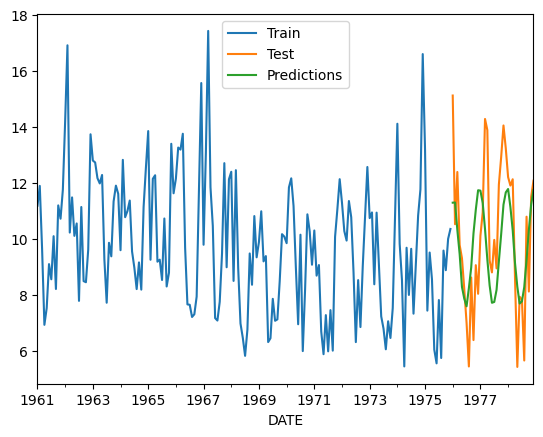

In [56]:
train.plot(legend=True, label='Train')
test.plot(legend=True, label='Test')
preds.plot(legend=True, label='Predictions')

In [ ]:
fnal_model = ARIMA(df1, )